In [1]:
%run setup.py
%config IPython.matplotlib.backend = "retina"

In [17]:
from lib.histdist import distance_to_edge, reduce_samples
def plot_model_diagram(diagram, xobs, yobs, xedge_obs, yedge_obs,
            xpdv, ypdv, xedge_pdv, yedge_pdv, filename, panels, perturb_data):
    
    idx = reduce_samples(xobs.shape[0], xpdv.shape[0])
    xpdv, ypdv = xpdv[idx], ypdv[idx]
    
    # result plot
    fig = plt.figure(figsize=mnras_size(ratio=0.85/2.*0.75,column="double"))
    axes = fig.subplots(nrows=1, ncols=2, squeeze=False).reshape(-1)
    
    axes[0].scatter(xobs, yobs, s=0.1, color=red, label="Kepler", rasterized=True)
    axes[1].scatter(xpdv, ypdv, s=0.1, color=blue, label="Galaxia", rasterized=True)
    axes[0].plot(xedge_obs, yedge_obs, "k-", linewidth=0.5, zorder=100, rasterized=True)
    axes[1].plot(xedge_pdv, yedge_pdv, "k-", linewidth=0.5, zorder=100, rasterized=True)
    
    # perturb data
    for tedges, _, _ in perturb_data:
        axes[0].plot(tedges[:,0], tedges[:,1], color='gray', linestyle='-', linewidth=1., zorder=99, rasterized=True)

    axes[0].text(0.05, 0.9, panels[0]+" Kepler", transform=axes[0].transAxes)
    axes[1].text(0.05, 0.9, panels[1]+" Galaxia", transform=axes[1].transAxes)
    
    for i in range(2):
        if diagram =="tnu":
            axes[i].axis([0, 130, 0.5, 10.0])
            axes[i].set_xlabel("$\\nu_{\\rm max}$ ($\\mu$Hz)")
            axes[i].set_ylabel("$\Delta\\nu$ ($\\mu$Hz)")
        else:
            axes[i].axis([0., 3.7, 5.0, 22.])
            axes[i].set_xlabel("$M$ ($M_{\odot}$)")
            axes[i].set_ylabel("$R$ ($R_{\odot}$)")       
        #axes[i].grid(True, zorder=-10)
        
    
    # plt.show()
    plt.tight_layout()
    plt.savefig(overleaf_path+filename)
    # plt.close()


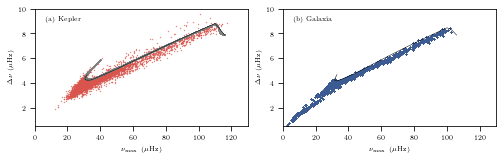

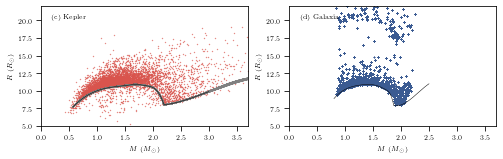

In [18]:
yu = np.load(work_path+'sample/heb/yu/yu18.npy',allow_pickle=True).tolist()
edge = np.load(work_path+'sample/heb/yu/tnu_edge_samples.npy')
tck_obs, tp_obs = np.load(work_path+"sample/heb/yu/nike_spline_tck.npy", allow_pickle=True)
xobs, yobs = yu["numax"], yu["dnu"]
xedge_obs, yedge_obs = edge[:,0], edge[:,1]

perturb_data = np.load(work_path+'sample/heb/yu_nc/tnu_perturb_data.npy', allow_pickle=True).tolist()

pdv = np.load(work_path+'sample/heb/padova/padova.npy',allow_pickle=True).tolist()
edge = np.load(work_path+'sample/heb/padova/tnu_edge_samples.npy')
tck_pdv, tp_pdv = np.load(work_path+'sample/heb/padova/nike_spline_tck.npy', allow_pickle=True)
xpdv, ypdv = pdv["numax"], pdv["dnu"]
xedge_pdv, yedge_pdv = edge[:,0], edge[:,1]




diagram = "tnu"
filename = "diagram_heb_tnu.pdf"
panels = ["(a)", "(b)"]
plot_model_diagram(diagram, xobs, yobs, xedge_obs, yedge_obs,
            xpdv, ypdv, xedge_pdv, yedge_pdv, filename, panels, perturb_data)


yu = np.load(work_path+'sample/heb/yu/yu18.npy',allow_pickle=True).tolist()
edge = np.load(work_path+'sample/heb/yu/mr_edge_samples.npy')
tck_obs, tp_obs = np.load(work_path+"sample/heb/yu/mr_spline_tck.npy", allow_pickle=True)
xobs, yobs = yu["mass"], yu["radius"]
idx = edge[:,0]<3.0
xedge_obs, yedge_obs = edge[:,0][idx], edge[:,1][idx]

perturb_data = np.load(work_path+'sample/heb/yu_nc/mr_perturb_data.npy', allow_pickle=True).tolist()

pdv = np.load(work_path+'sample/heb/padova/padova.npy',allow_pickle=True).tolist()
edge = np.load(work_path+'sample/heb/padova/mr_edge_samples.npy')
tck_pdv, tp_pdv = np.load(work_path+'sample/heb/padova/mr_spline_tck.npy', allow_pickle=True)
xpdv, ypdv = pdv["mass"], pdv["radius"]
idx = edge[:,0]<3.0
xedge_pdv, yedge_pdv = edge[:,0][idx], edge[:,1][idx]


diagram = "mr"
filename = "diagram_heb_mr.pdf"
panels = ["(c)", "(d)"]
plot_model_diagram(diagram, xobs, yobs, xedge_obs, yedge_obs,
            xpdv, ypdv, xedge_pdv, yedge_pdv, filename, panels, perturb_data)


In [15]:
from lib.histdist import distance_to_bump, reduce_samples
def plot_model_diagram(variable, xobs, yobs, xbump_obs, ybump_obs,
            xpdv, ypdv, xbump_pdv, ybump_pdv, filename, panels, perturb_data=None):
    
    # result plot
    fig = plt.figure(figsize=mnras_size(ratio=0.85/2.*0.75,column="double"))
    axes = fig.subplots(nrows=1, ncols=2, squeeze=False).reshape(-1)

    if variable == "lum":
        for i in range(2):
            axes[i].axis([5200, 4000, 7, 100])
            axes[i].set_xlabel("$T_{\\rm eff}$ (K)")
            axes[i].set_ylabel("$L$ ($L_{\\odot}$)")
            #axes[i].grid(True, zorder=-10)
        obsidx = (yobs>30) & (yobs<80)
        pdvidx = (ypdv>30) & (ypdv<80)
        ratio = np.sum(obsidx)/np.sum(pdvidx)
    elif variable == "dnu":
        for i in range(2):
            axes[i].axis([5200, 4000, 12, 0.5])
            axes[i].set_xlabel("$T_{\\rm eff}$ (K)")
            axes[i].set_ylabel("$\Delta\\nu$ ($\\mu$Hz)")
            #axes[i].grid(True, zorder=-10)
        obsidx = (yobs>8) & (yobs<12)
        pdvidx = (ypdv>8) & (ypdv<12)
        ratio = np.sum(obsidx)/np.sum(pdvidx)
    elif variable == "numax":
        for i in range(2):
            axes[i].axis([5200, 4000, 120, 5])
            axes[i].set_xlabel("$T_{\\rm eff}$ (K)")
            axes[i].set_ylabel("$\\nu_{\\rm max}$ ($\\mu$Hz)")
            #axes[i].grid(True, zorder=-10)
        obsidx = (yobs>80) & (yobs<120)
        pdvidx = (ypdv>80) & (ypdv<120)
        ratio = np.sum(obsidx)/np.sum(pdvidx)
    else:
        for i in range(2):
            axes[i].axis([0.5, 2.5, 5., 20.])
            axes[i].set_xlabel("$M$ ($M_{\odot}$)")
            axes[i].set_ylabel("$R$ ($R_{\odot}$)")   
            #axes[i].grid(True, zorder=-10)
        obsidx = (yobs>8) & (yobs<12)
        pdvidx = (ypdv>8) & (ypdv<12)
        ratio = np.sum(obsidx)/np.sum(pdvidx)    
    idx = reduce_samples(xpdv.shape[0], int(xpdv.shape[0]*ratio))
    xpdv, ypdv = xpdv[idx], ypdv[idx]
    
    axes[0].text(0.05, 0.9, panels[0]+" Kepler", transform=axes[0].transAxes)
    axes[1].text(0.05, 0.9, panels[1]+" Galaxia", transform=axes[1].transAxes)
    
    
    axes[0].scatter(xobs, yobs, s=0.1, color=red, label="Kepler", rasterized=True)
    axes[1].scatter(xpdv, ypdv, s=0.1, color=blue, label="Galaxia", rasterized=True)
    axes[0].plot(xbump_obs, ybump_obs, "k-", linewidth=0.5, zorder=100, rasterized=True)
    axes[1].plot(xbump_pdv, ybump_pdv, "k-", linewidth=0.5, zorder=100, rasterized=True)
    
    # perturb data
    if not (perturb_data is None):
        for d in perturb_data:
            k,b = d[0]
            tx = np.linspace(2.0, 0.75, 100)
            ty = tx*k + b
            axes[0].plot(tx, ty, color='gray', linestyle='-', linewidth=1., zorder=99, rasterized=True)
        
    # plt.show()
    plt.tight_layout()
    plt.savefig(overleaf_path+filename)
    # plt.close()


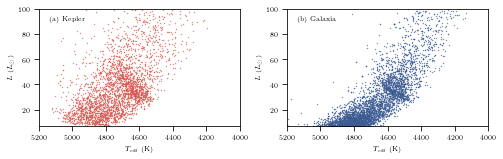

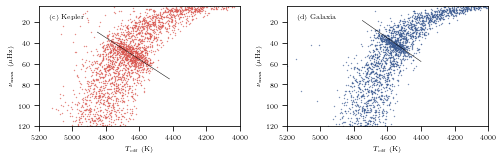

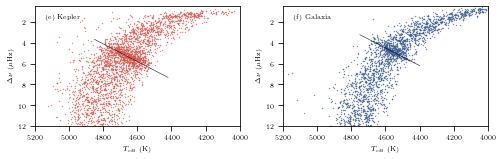

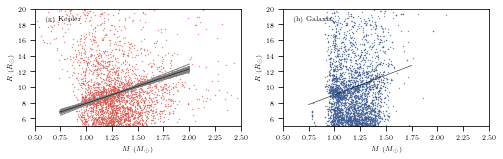

In [16]:
yu = np.load(work_path+'sample/rgb/yu/apk18.npy',allow_pickle=True).tolist()
bump = np.load(work_path+'sample/rgb/yu/numax_bump.npy')
xobs, yobs = yu["teff"], (yu["numax"]/3050)**2.*(yu['dnu']/135.1)**-4*(yu['teff']/5777.)**5.
xbump_obs = np.linspace(4850, 4420, 100)
ybump_obs = xbump_obs*0.

pdv = np.load(work_path+'sample/rgb/mist/mist.npy',allow_pickle=True).tolist()
bump = np.load(work_path+'sample/rgb/mist/numax_bump.npy')
xpdv, ypdv = pdv["teff"], (pdv["numax"]/3050)**2.*(pdv['dnu']/135.1)**-4*(pdv['teff']/5777.)**5.
xbump_pdv = np.linspace(4750, 4400, 100)
ybump_pdv = xbump_pdv*0.

variable = "lum"
filename = "diagram_rgb_lum.pdf"
panels = ["(a)", "(b)"]
plot_model_diagram(variable, xobs, yobs, xbump_obs, ybump_obs,
            xpdv, ypdv, xbump_pdv, ybump_pdv, filename, panels)



yu = np.load(work_path+'sample/rgb/yu/apk18.npy',allow_pickle=True).tolist()
bump = np.load(work_path+'sample/rgb/yu/numax_bump.npy')
xobs, yobs = yu["teff"], yu["numax"]
xbump_obs = np.linspace(4850, 4420, 100)
ybump_obs = bump[0]*xbump_obs+bump[1]

pdv = np.load(work_path+'sample/rgb/mist/mist.npy',allow_pickle=True).tolist()
bump = np.load(work_path+'sample/rgb/mist/numax_bump.npy')
xpdv, ypdv = pdv["teff"], pdv["numax"]
xbump_pdv = np.linspace(4750, 4400, 100)
ybump_pdv = bump[0]*xbump_pdv+bump[1]

variable = "numax"
filename = "diagram_rgb_numax.pdf"
panels = ["(c)", "(d)"]
plot_model_diagram(variable, xobs, yobs, xbump_obs, ybump_obs,
            xpdv, ypdv, xbump_pdv, ybump_pdv, filename, panels)




yu = np.load(work_path+'sample/rgb/yu/apk18.npy',allow_pickle=True).tolist()
bump = np.load(work_path+'sample/rgb/yu/dnu_bump.npy')
xobs, yobs = yu["teff"], yu["dnu"]
xbump_obs = np.linspace(4850, 4420, 100)
ybump_obs = bump[0]*xbump_obs+bump[1]

pdv = np.load(work_path+'sample/rgb/mist/mist.npy',allow_pickle=True).tolist()
bump = np.load(work_path+'sample/rgb/mist/dnu_bump.npy')
xpdv, ypdv = pdv["teff"], pdv["dnu"]
xbump_pdv = np.linspace(4750, 4400, 100)
ybump_pdv = bump[0]*xbump_pdv+bump[1]

variable = "dnu"
filename = "diagram_rgb_dnu.pdf"
panels = ["(e)", "(f)"]
plot_model_diagram(variable, xobs, yobs, xbump_obs, ybump_obs,
            xpdv, ypdv, xbump_pdv, ybump_pdv, filename, panels)



yu = np.load(work_path+'sample/rgb/yu/apk18.npy',allow_pickle=True).tolist()
bump = np.load(work_path+'sample/rgb/yu/mr_bump.npy')
xobs, yobs = yu["mass"], yu["radius"]
xbump_obs = np.linspace(0.75, 2.0, 10)
ybump_obs = bump[0]*xbump_obs+bump[1]

pdv = np.load(work_path+'sample/rgb/mist/mist.npy',allow_pickle=True).tolist()
bump = np.load(work_path+'sample/rgb/mist/mr_bump.npy')
xpdv, ypdv = pdv["mass"], pdv["radius"]
xbump_pdv = np.linspace(0.75, 1.75, 10)
ybump_pdv = bump[0]*xbump_pdv+bump[1]


perturb_data = np.load(work_path+'sample/rgb/yu_nc/mr_perturb_data.npy', allow_pickle=True).tolist()

variable = "mr"
filename = "diagram_rgb_mr.pdf"
panels = ["(g)", "(h)"]
plot_model_diagram(variable, xobs, yobs, xbump_obs, ybump_obs,
            xpdv, ypdv, xbump_pdv, ybump_pdv, filename, panels, perturb_data=perturb_data)